In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns


In [905]:
df=pd.read_csv("GOLD.csv")

In [906]:
df["Pred"]

0      738.0
1     -146.0
2       30.0
3      357.0
4      124.0
       ...  
507      NaN
508      NaN
509      NaN
510      NaN
511      NaN
Name: Pred, Length: 512, dtype: float64

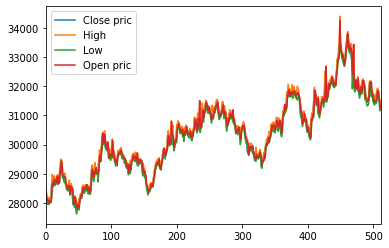

In [907]:
df.Price.plot(label="Close pric")
df.High.plot()
df.Low.plot()
df.Open.plot(label="Open pric")
plt.legend()

In [924]:

X = df[["Open","Low","High","Price"]];
y = df["Pred"].fillna(0);
m = len(y);

In [909]:
y=y.iloc[:411]

In [910]:
X=X.iloc[:411]

In [911]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (287, 4) (287,)
Test set: (124, 4) (124,)


In [912]:
df["Change %"]=df["Change %"].str.rstrip("%").astype('float')*100

In [913]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-179.0,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,44.0,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-23.0,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-49.0,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,9.0,124.0,112.153318


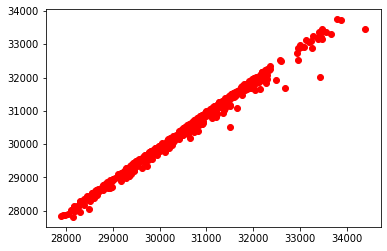

In [914]:
plt.scatter(df.High,df.Price,color='red')
plt.show()

In [915]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train)
train_y = np.asanyarray(y_train)
regr.fit (train_x, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [916]:
prdct=regr.predict(X_test)

In [917]:
prdct

array([ 662.,  167.,  818.,  120.,  224.,  358.,  124.,  106.,   33.,
        350.,  569.,   67.,  340.,  551.,   22., -125.,  310.,  345.,
        612.,  159.,  333.,   35.,  561.,  378.,  252.,   75.,  754.,
        522.,  339.,  452.,   85.,  566.,   79.,  344.,  295.,  364.,
        409.,  168.,  541.,  299., 1177.,  138.,  913.,  238.,  375.,
        184.,  906.,  550.,  263.,  115.,  132.,  336.,  339., 1521.,
        977.,  316.,  853.,  740.,  403.,   94.,  124.,  247.,  386.,
         69.,  264., -101.,  420.,  219.,   35.,  386.,  242.,  524.,
        498.,  510.,  482.,  139.,  286.,  681.,  608.,   90.,   92.,
        246.,  702.,  483.,  804.,   73.,  521.,  377.,  196.,  429.,
        178.,  491.,  460.,  251.,  183.,  -39., -146.,  143.,  220.,
        441.,  486.,  405.,  138.,  582.,  202.,  239.,  265.,  251.,
        168.,   38.,  476.,   72.,  684.,  542.,  397.,  336.,  262.,
        205.,   23.,  464.,  104.,  240.,  592.,  421.])

In [918]:
prdct=pd.DataFrame(prdct)

In [919]:
prdct=prdct.astype(int)

In [920]:
regr.score(train_x,train_y)

1.0

In [921]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(X_test)
test_y = np.asanyarray(y_test)
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


Now as the data has been trained on availabel data of both the feature and the predicted value thus we get a high score of 1 thus now with testing the X_test new value for predicting unknown value

In [930]:
X_test0=X.iloc[411:]

In [932]:
X_test0

,Open,Low,High,Price
411,31850,31618,31850,31812
412,31749,31582,31749,31626
413,31550,31337,31600,31414
414,31440,31384,31514,31437
415,31369,31291,31530,31501
416,31589,31041,31650,31075
417,31167,30967,31500,31139
418,31027,30914,31250,31219
419,31115,31075,31292,31126
420,31300,31177,31395,31375


In [933]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train)
train_y = np.asanyarray(y_train)
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [ 3. -4. -1.  2.]
Intercept:  2.2168933355715126e-11


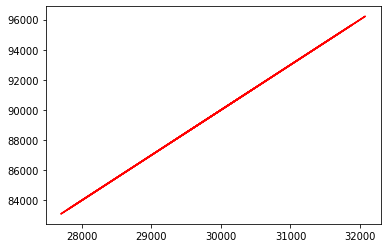

In [934]:
plt.plot(train_x,regr.coef_[0]*train_x + regr.intercept_, '-r')

In [935]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [ 3. -4. -1.  2.]
Intercept:  2.2168933355715126e-11


In [936]:
prdct=regr.predict(X_test0)

In [937]:
prdct#remaining value

array([ 852.,  422.,  530.,  144.,  415., 1103.,  411.,  613.,    5.,
        547.,  -27.,  368.,  263.,  615.,  479.,  -82.,  489., 2890.,
        340.,  274.,  469.,  487.,  -48.,  364.,    7.,  277.,  283.,
        550.,  110.,  413.,  146.,  241.,  406.,  119.,  405.,  303.,
        154.,  679., 2111.,  860.,  -37.,  615.,  468.,  716.,  410.,
        251.,  466.,  254.,  109.,  470.,  241.,  776.,  471.,  555.,
       -139.,  224.,  603., 3024.,  331., 2895.,  476.,  589.,  233.,
        670.,  152.,   32.,  960.,  359.,  595.,  439.,  586.,   93.,
        741.,  466.,  502.,  159.,  833.,  378.,    6.,  694.,  518.,
        554.,  517.,  202.,  338.,  489., 1070.,   -8.,  579.,  468.,
        223.,  264., -132.,  350.,  359.,  446.,  535.,  438.,  269.,
        601.,  280.])

In [938]:
prdct=prdct.astype(int)

In [939]:
prdct#Remaining value of Pred

array([ 851,  421,  529,  143,  414, 1102,  410,  612,    4,  546,  -27,
        367,  262,  614,  478,  -82,  488, 2889,  339,  273,  468,  486,
        -48,  363,    6,  276,  282,  549,  109,  412,  145,  240,  405,
        118,  404,  302,  153,  678, 2110,  859,  -37,  614,  467,  715,
        409,  250,  465,  253,  108,  469,  240,  775,  470,  554, -139,
        223,  602, 3023,  330, 2894,  475,  588,  232,  669,  151,   31,
        959,  358,  594,  438,  585,   92,  740,  465,  501,  158,  832,
        377,    5,  693,  517,  553,  516,  201,  337,  488, 1069,   -8,
        578,  467,  222,  263, -132,  349,  358,  445,  534,  437,  268,
        600,  279])

In [940]:
prdct.shape

(101,)

In [941]:
prdct=pd.DataFrame(prdct)

In [942]:
prdct.columns=["Pred"]

In [943]:
prdct

,Pred
0,851
1,421
2,529
3,143
4,414
5,1102
6,410
7,612
8,4
9,546


## Fitting the other column (new)

In [944]:
X1 = df[["Open","Low","High","Price"]];
y1 = df["new"].fillna(0);

In [945]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.3, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (287, 4) (287,)
Test set: (101, 4) (124,)


In [946]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x1 = np.asanyarray(X_train1)
train_y1 = np.asanyarray(y_train1)
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [-1.00039938 -1.01810115  1.00537134  1.01306267]
Intercept:  0.3668732129400212


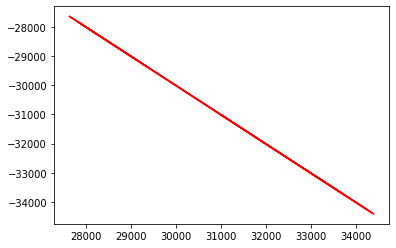

In [949]:
plt.plot(train_x1,regr.coef_[0]*train_x1 + regr.intercept_, '-r')


In [950]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(X_test1)
test_y = np.asanyarray(y_test1)
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual  Root sum of squares (RMSE): %.2f" % np.sqrt(np.mean((test_y_hat - test_y) ** 2)))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.41
Residual  Root sum of squares (RMSE): 0.53
R2-score: 1.00


R2score as Close to 1 makes it more eficient 


In [951]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [969]:
x_pol=poly.fit_transform(X_train1)

In [970]:
regr.fit(x_pol,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [971]:
Poly_reg=regr.predict(poly.fit_transform(X_test1))

In [972]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(X_test1)
test_y = np.asanyarray(y_test1)
test_y_hat = Poly_reg

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual  Root sum of squares (RMSE): %.2f" % np.sqrt(np.mean((test_y_hat - test_y) ** 2)))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.01
Residual  Root sum of squares (RMSE): 0.02
R2-score: 1.00


# Thus we can see that as the error are very much less  the new column is Polynomial realated to OHLC

In [5]:
nift=pd.read_csv("Nifty50.csv")
stck=pd.read_csv("IDBI.csv")


In [6]:
stck.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,IDBI,EQ,15-May-2017,75.50,75.70,76.10,73.15,75.25,75.05,74.58,6688622,4.988258e+08,16062,1486475,22.22
1,IDBI,EQ,16-May-2017,75.05,75.30,77.75,73.85,77.05,76.65,75.38,8740098,6.587996e+08,24319,2578070,29.50
2,IDBI,EQ,17-May-2017,76.65,76.65,77.30,75.60,75.75,75.95,76.37,3152912,2.407824e+08,11386,643174,20.40
3,IDBI,EQ,18-May-2017,75.95,75.00,75.50,69.05,69.05,69.95,71.46,15086266,1.078020e+09,36259,2852529,18.91
4,IDBI,EQ,19-May-2017,69.95,69.00,70.95,68.50,68.70,68.75,69.42,10966153,7.612893e+08,39512,1949156,17.77


In [7]:
nift.max()

Date                 31-Oct-2018
Open                     11856.1
High                     11856.1
Low                      11738.5
Close                    11787.1
Shares Traded          741153209
Turnover (Rs. Cr)        35131.2
dtype: object

In [8]:
mtr=pd.merge(nift[["Date","Close"]],
                        stck[["Date","Close Price"]],
                         on="Date"
                        )


In [9]:
mtr.columns=['Date','NIFT','IDBI']

In [10]:
mtr.dtypes

Date     object
NIFT    float64
IDBI    float64
dtype: object

In [11]:
mtr["Date"]=mtr["Date"].astype("datetime64")

## Calculation of Daily for past 3 month

In [15]:
monthly=mtr.resample('M').mean().pct_change()

In [16]:
monthly=monthly.dropna()

In [17]:
monthly.tail(3)

,NIFT,IDBI
Date,,
2019-03-31,0.044620,-0.012264
2019-04-30,0.030857,-0.002342
2019-05-31,-0.018323,-0.136325


In [19]:
mtr=mtr.set_index(['Date'])

KeyError: "None of ['Date'] are in the columns"

In [523]:
mtr["Date"].astype("datetime64")

0     2017-05-15
1     2017-05-16
2     2017-05-17
3     2017-05-18
4     2017-05-19
         ...    
489   2019-05-07
490   2019-05-08
491   2019-05-09
492   2019-05-10
493   2019-05-13
Name: Date, Length: 494, dtype: datetime64[ns]

In [1]:
Daily=mtr.resample('D').mean().pct_change()

NameError: name 'mtr' is not defined

In [854]:
Daily=Daily.dropna()

In [872]:
Daily=Daily.tail(90)

In [719]:
!pip install statsmodels

In [23]:
import statsmodels.api as sm

In [24]:
X_=Daily["NIFT"]
y_=Daily["IDBI"]

X11=sm.add_constant(X_)
model=sm.OLS(y_,X11)
results=model.fit()
print(results.summary())

NameError: name 'Daily' is not defined

## MONTHLY RETURNS BETA

In [25]:
monthly=mtr.resample('M').mean().pct_change()

In [26]:
monthly=monthly.dropna()

In [27]:
X_=monthly["NIFT"]
y_=monthly["IDBI"]

X11=sm.add_constant(X_)
model=sm.OLS(y_,X11)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   IDBI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                   0.01195
Date:                Fri, 13 Sep 2019   Prob (F-statistic):              0.914
Time:                        01:14:16   Log-Likelihood:                 24.916
No. Observations:                  24   AIC:                            -45.83
Df Residuals:                      22   BIC:                            -43.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0200      0.019     -1.046      0.3

C:\Users\TUSHAR\.conda\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


*The beta Value for the Monthly returns were less than 1 wheras for daily returns for 3 months was greater i have used OLS for beta calculation of the two different question for IDBI stock although none were negative bus as the Beta value determines the voltality of a stock .A negative beta means that the stock investment moves in opposite of stock market i.e whwnever market falls we can see a rise in negative Beta*